# Ranking Determination for Design!!!!!!

Which design will win????? Time to find out!

## Here are some important imports u need to use

``
python -m pip install -U matplotlib   
``


``
pip install numpy 
``

In [32]:
import csv
import numpy as np
import matplotlib.pyplot as plt

#   What Am I Doing?

1) Process the data
2) organize the data by choice #
3) display some plots for visuals
4) Use some voting algos to figure out the top choice + visuals


In [33]:
#   [0,0,0]: idx 0 = first choice, idx 1 = 2nd choice, idx 2 = 3rd choice
# data_umpressed = {"Design #1": [0,0,0], "Design #2": [0,0,0], "Design #3": [0,0,0], "Design #4": [0,0,0], "Design #5": [0,0,0], "Design #6": [0,0,0]}
data_umpressed = [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]]



with open('data\DesignMerchHouseVote.csv', mode = 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for lines in reader:
        choice1 = int(lines[1][-1]) - 1
        choice2 = int(lines[2][-1]) - 1
        choice3 = int(lines[3][-1]) - 1

        data_umpressed[choice1][0] += 1
        data_umpressed[choice2][1] += 1
        data_umpressed[choice3][2] += 1

    
print(data_umpressed)



[[7, 11, 7], [12, 5, 8], [8, 11, 6], [19, 11, 4], [3, 8, 16], [1, 4, 9]]


### Separate data by choice #

In [43]:
#  All First Choices
choice1All = [data_umpressed[i][0] for i in range(len(data_umpressed))]
print("Choice #1")
print(choice1All)
print()

#  All Second Choices
choice2All = [data_umpressed[i][1] for i in range(len(data_umpressed))]
print("Choice #2")
print(choice2All)
print()

#  All Third Choices
choice3All = [data_umpressed[i][2] for i in range(len(data_umpressed))]
print("Choice #3")
print(choice3All)
print()

Choice #1
[7, 12, 8, 19, 3, 1]

Choice #2
[11, 5, 11, 11, 8, 4]

Choice #3
[7, 8, 6, 4, 16, 9]



### Bar Graph the choice data

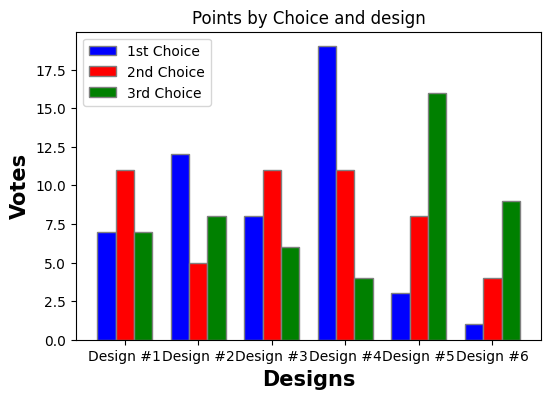

In [75]:
#   Bar Graph of all choice Display

barWidth = 0.25
fig = plt.subplots(figsize =(6, 4)) 


br1 = np.arange(len(choice1All)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, choice1All, color ='b', width = barWidth, 
        edgecolor ='grey', label ='1st Choice') 
plt.bar(br2, choice2All, color ='r', width = barWidth, 
        edgecolor ='grey', label ='2nd Choice') 
plt.bar(br3, choice3All, color ='g', width = barWidth, 
        edgecolor ='grey', label ='3rd Choice') 

plt.title("Points by Choice and design")
plt.xlabel('Designs', fontweight ='bold', fontsize = 15) 
plt.ylabel('Votes', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(choice1All))], 
        ['Design #1', 'Design #2', 'Design #3', 'Design #4', 'Design #5', 'Design #6'])

plt.legend()
plt.show() 

# Borda Count
Aka: \
1st choice = 3 pts \
2nd choice = 2 pts \
3rd choice = 1 pt

In [ ]:
#   Use Borda Count Algo
#   tally data
design_points = [0 for i in range(6)]

for i in range(len(choice1All)):
    design_points[i] += 3 * choice1All[i]

for i in range(len(choice2All)):
    design_points[i] += 2 * choice2All[i]

for i in range(len(choice3All)):
    design_points[i] += 1 * choice3All[i]

design_point_formatted = []
for idx, points in enumerate(design_points):
    design_name = f"Design #{idx + 1}"
    design_point_formatted.append(tuple([design_name, points]))

print(design_points)
print(design_point_formatted)


[50, 54, 52, 83, 41, 20]
[('Design #1', 50), ('Design #2', 54), ('Design #3', 52), ('Design #4', 83), ('Design #5', 41), ('Design #6', 20)]


[('Design #4', 83), ('Design #2', 54), ('Design #3', 52), ('Design #1', 50), ('Design #5', 41), ('Design #6', 20)]


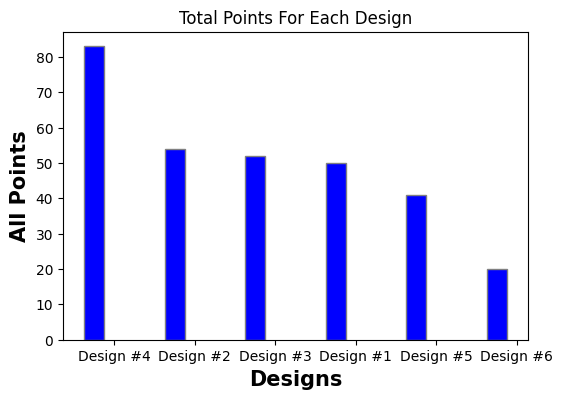

In [74]:
#   Final Point Display
design_point_formatted.sort(reverse=True, key = lambda x: x[1])
print(design_point_formatted)

finalized_data = [design_point_formatted[i][1] for i in range(len(design_point_formatted))]
x_label = [design_point_formatted[i][0] for i in range(len(design_point_formatted))]

#       Visual Data from Borda Count
barWidth = 0.25
fig = plt.subplots(figsize =(6, 4)) 


br1 = np.arange(len(finalized_data)) 


plt.bar(br1, finalized_data, color='b', width = barWidth, 
        edgecolor ='grey') 

plt.title("Total Points For Each Design")
plt.xlabel('Designs', fontweight ='bold', fontsize = 15) 
plt.ylabel('All Points', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(finalized_data))], 
       x_label)

plt.show() 


In [76]:
print("Data Processed")
print(data_umpressed, '\n')

print("Final Ranking")
print(design_point_formatted, '\n')


Data Processed
[[7, 11, 7], [12, 5, 8], [8, 11, 6], [19, 11, 4], [3, 8, 16], [1, 4, 9]] 

Final Ranking
[('Design #4', 83), ('Design #2', 54), ('Design #3', 52), ('Design #1', 50), ('Design #5', 41), ('Design #6', 20)] 



# Conclusion

Yeah looks like Design 4 won congrats Maddie! :D